# Analysis with Facebook Prophet on 2019 - 2020 data: Forecasting ED patient arrival
# Univariate Facebook Prophet model

In [255]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [256]:
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

In [257]:
af = pd.read_excel('Time series data_2019_2020.xlsx')

In [258]:
af.columns = ['ds', 'y']
af['ds']=pd.to_datetime(af['ds'])

In [259]:
af.head(10)

,ds,y
0,2019-01-01,259
1,2019-01-02,322
2,2019-01-03,295
3,2019-01-04,293
4,2019-01-05,277
5,2019-01-06,268
6,2019-01-07,299
7,2019-01-08,318
8,2019-01-09,279
9,2019-01-10,273


In [260]:
af.tail(5)

,ds,y
726,2020-12-27,186
727,2020-12-28,241
728,2020-12-29,206
729,2020-12-30,200
730,2020-12-31,186


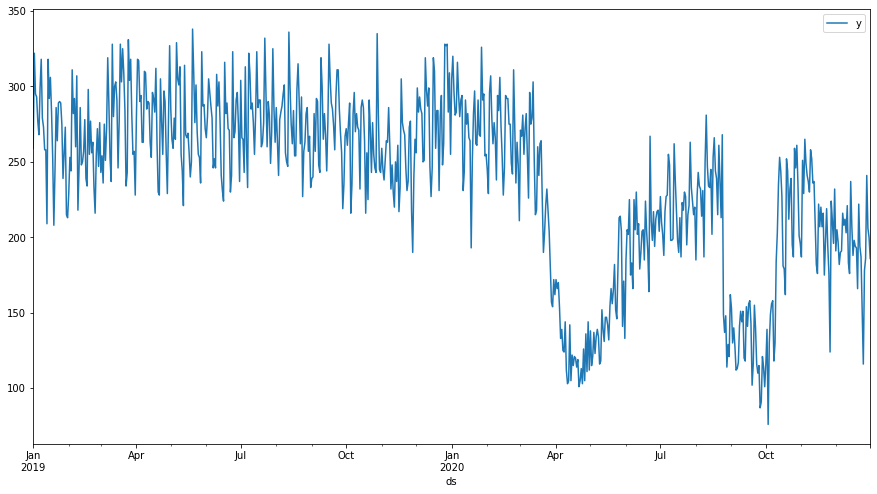

In [261]:
af.plot(x='ds', y = 'y', figsize= (15,8));

In [262]:
train = af.iloc[:671]
test = af.iloc[671:]

In [263]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [264]:
future = m.make_future_dataframe(periods = 60, freq = 'D')

In [265]:
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
726,2020-12-27
727,2020-12-28
728,2020-12-29
729,2020-12-30


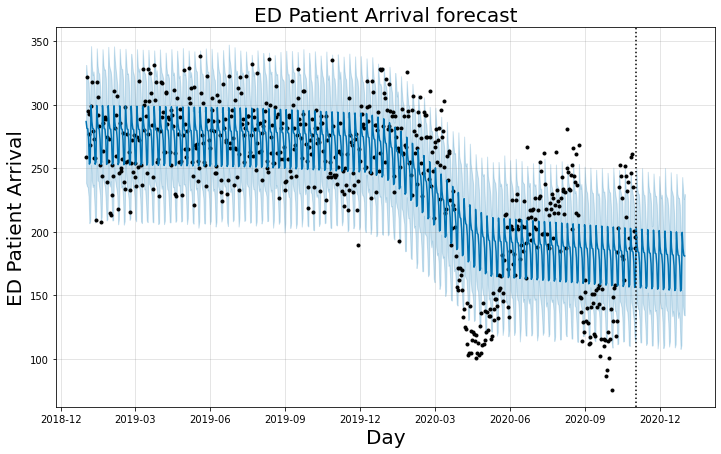

In [279]:
from datetime import datetime, timedelta

forecast = m.predict(future)
forecast
fig = m.plot(forecast)

datenow = datetime(2020, 11, 2)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

#plt.xlim([datestart, dateend])
plt.title("ED Patient Arrival forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("ED Patient Arrival", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")

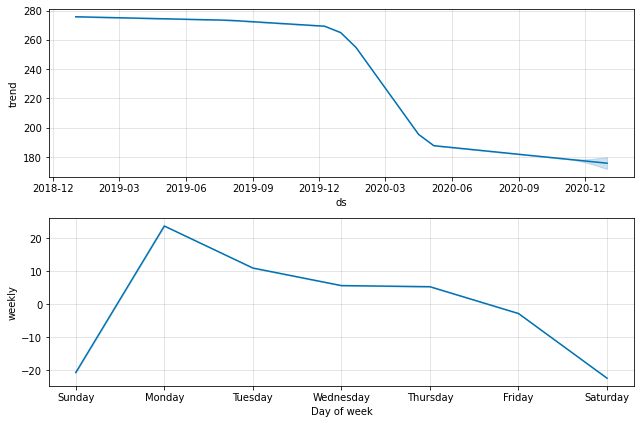

In [267]:
fig = m.plot_components(forecast) #ETS for prophet

In [268]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

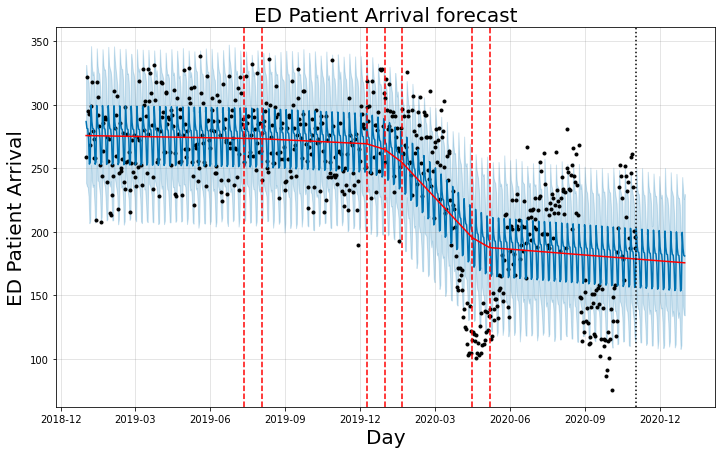

In [280]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m ,forecast)

datenow = datetime(2020, 11, 2)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

#plt.xlim([datestart, dateend])
plt.title("ED Patient Arrival forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("ED Patient Arrival", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")

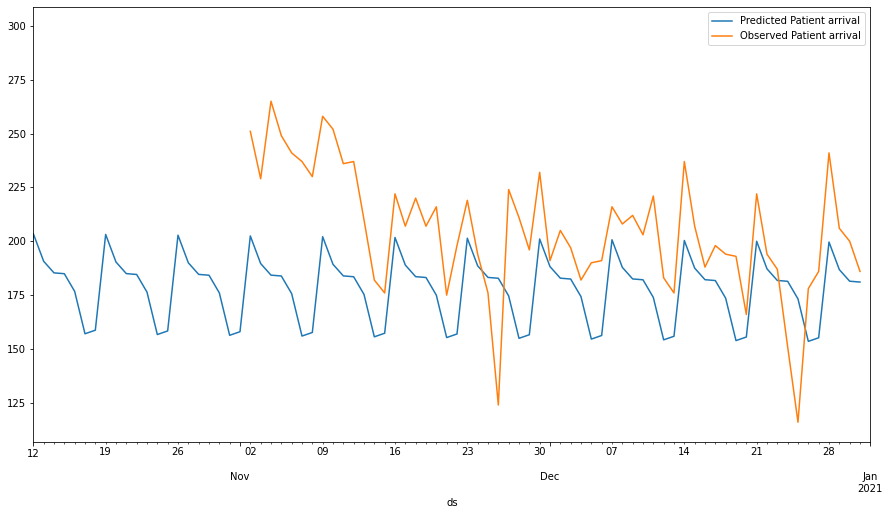

In [270]:
ax = forecast.plot(x='ds', y='yhat', label = 'Predicted Patient arrival', legend = True, figsize = (15,8))
test.plot(x='ds', y='y', label = 'Observed Patient arrival', legend = True, ax=ax, xlim = ('2020-10-12','2021-01-01'));

In [271]:
predictions = forecast.iloc[-60:]['yhat']

In [272]:
predictions = list(predictions)

In [273]:
predictions

[202.46091412154618,
 189.64941665921162,
 184.26870220385078,
 183.87762738505396,
 175.68822210743363,
 155.99884951133797,
 157.66379214702522,
 202.10885603355578,
 189.29735857126875,
 183.91664411583412,
 183.52556929710605,
 175.33616401954094,
 155.6467914233656,
 157.31173405905895,
 201.75679794556487,
 188.94530048325436,
 183.56458602786907,
 183.17351120907125,
 174.98410593150768,
 155.29473333532263,
 156.95967597107273,
 201.4047398575751,
 188.59324239522107,
 183.21252793981782,
 182.82145312103643,
 174.63204784347445,
 154.94267524731495,
 156.60761788295417,
 201.05268176958413,
 188.24118430722558,
 182.86046985183572,
 182.46939503308852,
 174.27998975553805,
 154.59061715927197,
 156.255559794968,
 200.70062368150948,
 187.88912621919232,
 182.50841176381908,
 182.11733694502925,
 173.9279316675485,
 154.23855907129962,
 155.9035017070017,
 200.3485655935197,
 187.53706813124944,
 182.15635367580242,
 181.76527885703786,
 173.57587357947156,
 153.88650098325664,

In [274]:
rmse(predictions, test['y'])

37.72008904908207

In [275]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions, test['y'])

32.15824042088742

In [367]:
test.mean()

y    191.904762
dtype: float64

In [368]:
predictions.mean() 

196.82334847096212

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


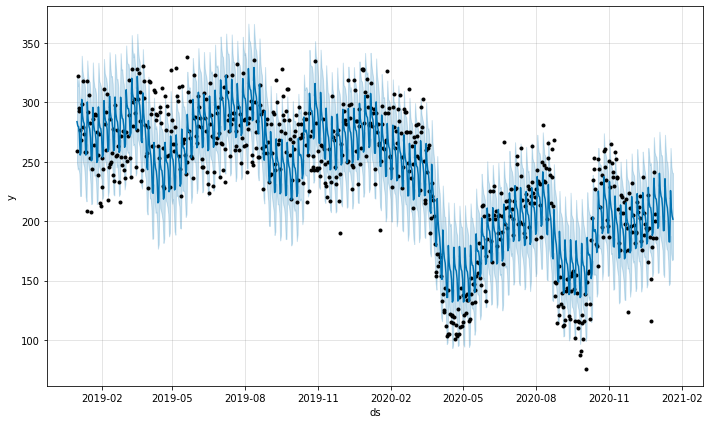

In [369]:
m = Prophet()
m.fit(af)
future = m.make_future_dataframe(periods = 21, freq = 'D')
forecast = m.predict(future)
fig = m.plot(forecast)

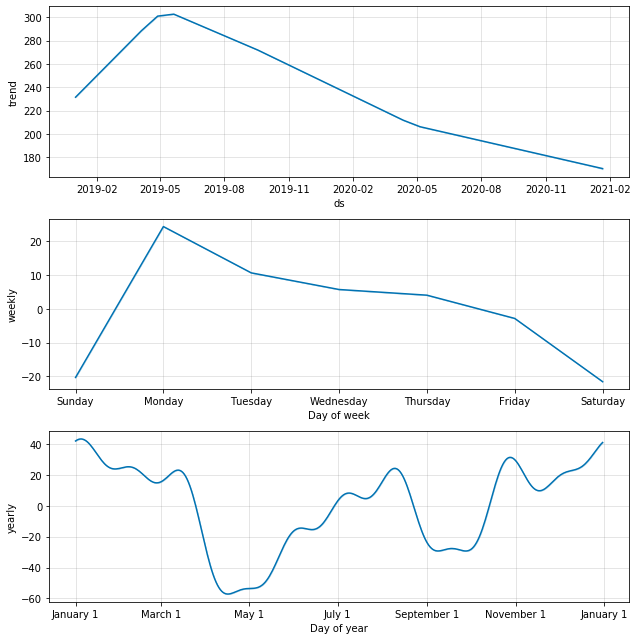

In [370]:
fig = m.plot_components(forecast)

In [371]:
from fbprophet.diagnostics import cross_validation, performance_metrics
af_cv = cross_validation(m, horizon='90 days')
af_p = performance_metrics(af_cv)
af_p.head(5)

INFO:fbprophet:Making 363 forecasts with cutoffs between 2020-01-02 00:00:00 and 2020-12-29 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1472.145665,38.368550,30.838766,0.181606,0.129677,0.539945
1,2 days,1647.305336,40.587009,32.709949,0.192673,0.137944,0.531680


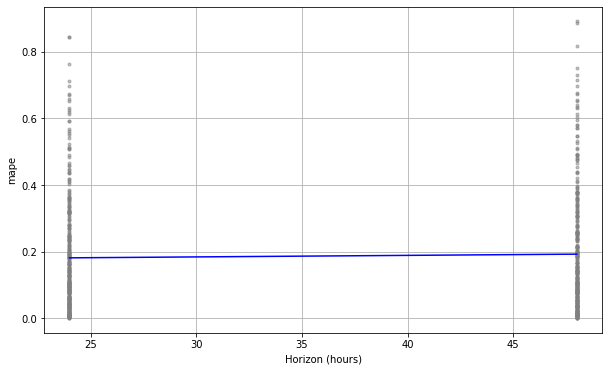

In [372]:
from fbprophet.plot import plot_cross_validation_metric
fig7 = plot_cross_validation_metric(af_cv, metric='mape')

In [373]:
forecast.iloc[-21:] # RMSE = 34, therefore the error is 17.0%. The model accounts for 83% of the data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
731,2021-01-01,173.147668,176.455911,249.301242,173.147668,173.147668,39.129041,39.129041,39.129041,-2.851357,-2.851357,-2.851357,41.980398,41.980398,41.980398,0.0,0.0,0.0,212.276710
732,2021-01-02,173.009902,156.518174,229.921732,173.009902,173.009902,21.026464,21.026464,21.026464,-21.560823,-21.560823,-21.560823,42.587287,42.587287,42.587287,0.0,0.0,0.0,194.036366
733,2021-01-03,172.872136,156.787018,232.915272,172.872136,172.872136,22.699016,22.699016,22.699016,-20.316067,-20.316067,-20.316067,43.015083,43.015083,43.015083,0.0,0.0,0.0,195.571152
734,2021-01-04,172.734370,204.480491,275.295244,172.734370,172.734370,67.596691,67.596691,67.596691,24.343946,24.343946,24.343946,43.252745,43.252745,43.252745,0.0,0.0,0.0,240.331061
735,2021-01-05,172.596604,187.705906,263.382176,172.596604,172.596604,53.932215,53.932215,53.932215,10.638633,10.638633,10.638633,43.293582,43.293582,43.293582,0.0,0.0,0.0,226.528819
736,2021-01-06,172.458838,184.064706,255.521081,172.458838,172.458838,48.847529,48.847529,48.847529,5.712033,5.712033,5.712033,43.135496,43.135496,43.135496,0.0,0.0,0.0,221.306367
737,2021-01-07,172.321072,180.569635,255.560892,172.303407,172.321072,46.814713,46.814713,46.814713,4.033635,4.033635,4.033635,42.781078,42.781078,42.781078,0.0,0.0,0.0,219.135785
738,2021-01-08,172.183305,174.915907,248.684197,172.141696,172.194985,39.386212,39.386212,39.386212,-2.851357,-2.851357,-2.851357,42.237569,42.237569,42.237569,0.0,0.0,0.0,211.569517
739,2021-01-09,172.045539,155.187153,229.749577,171.978930,172.066838,19.955861,19.955861,19.955861,-21.560823,-21.560823,-21.560823,41.516684,41.516684,41.516684,0.0,0.0,0.0,192.001401
740,2021-01-10,171.907773,153.161175,229.679112,171.815830,171.942745,20.318239,20.318239,20.318239,-20.316067,-20.316067,-20.316067,40.634307,40.634307,40.634307,0.0,0.0,0.0,192.226013


In [374]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(predictions, test['y'])

14.90002451333611

In [375]:
# 6.3% error

## Multivariate Model
## Facebook Prophet with Regressor Variables

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [300]:
df = pd.read_csv('Time series data_neww.csv')
df = df[['Date', 'No of Patients', 'Lockdown', 'Humidity','Max Temp', 'Avg Temp', 'Min Temp', 
         'Precipitation', 'Pressure']].dropna()

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

d_df['date_index'] = d_df['Date']
d_df['date_index'] = pd.to_datetime(d_df['date_index'])
d_df = d_df.set_index('date_index')

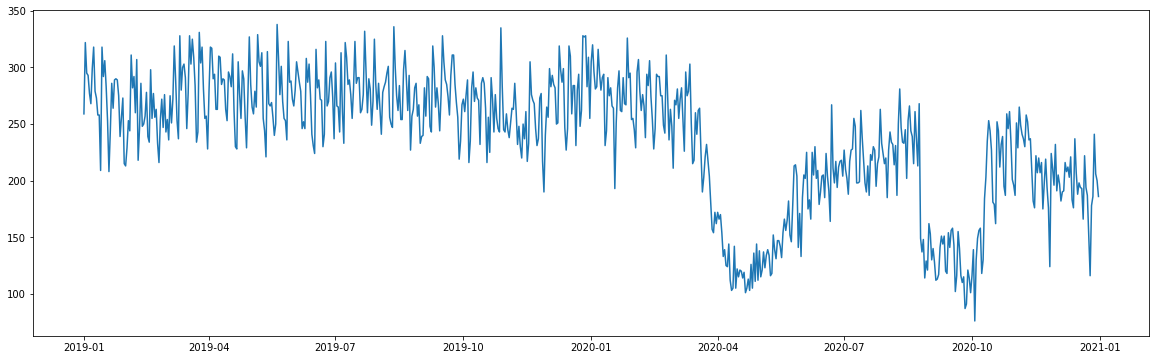

In [301]:
d_df.columns = ['ds', 'y', 'Lockdown', 'Humidity', 'Max Temp', 'Avg Temp', 'Min Temp', 
         'Precipitation', 'Pressure']

fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [302]:
t = 271.99
min_t = 269.55
max_t = 274.26
n_t = (t - min_t)/(max_t - min_t)
print(n_t)

future_range = pd.date_range('2021-01-01', periods=10, freq='D')
future_temp_df = pd.DataFrame({'future_date': future_range, 'future_Max Temp':0, 'future_Avg Temp': 0, 
                               'future_Min Temp':0, 'future_Precipitation': 0, 'future_Humidity': 0,  'future_Pressure': 0}) 

future_temp_df['future_date'] = pd.to_datetime(future_temp_df['future_date'])
future_temp_df = future_temp_df.set_index('future_date')

#future_temp_df.at['2021-01-01', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-02', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-03', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-04', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-05', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-06', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-07', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-08', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-09', 'future_Lockdown'] = 1
#future_temp_df.at['2021-01-10', 'future_Lockdown'] = 1

future_temp_df.at['2021-01-01', 'future_Max Temp'] = 274.26
future_temp_df.at['2021-01-02', 'future_Max Temp'] = 275.92
future_temp_df.at['2021-01-03', 'future_Max Temp'] = 274.81
future_temp_df.at['2021-01-04', 'future_Max Temp'] = 274.81
future_temp_df.at['2021-01-05', 'future_Max Temp'] = 274.81
future_temp_df.at['2021-01-06', 'future_Max Temp'] = 276.48
future_temp_df.at['2021-01-07', 'future_Max Temp'] = 275.92
future_temp_df.at['2021-01-08', 'future_Max Temp'] = 273.15
future_temp_df.at['2021-01-09', 'future_Max Temp'] = 278.70
future_temp_df.at['2021-01-10', 'future_Max Temp'] = 274.81

future_temp_df.at['2021-01-01', 'future_Avg Temp'] = 272.53
future_temp_df.at['2021-01-02', 'future_Avg Temp'] = 274.53
future_temp_df.at['2021-01-03', 'future_Avg Temp'] = 274.26
future_temp_df.at['2021-01-04', 'future_Avg Temp'] = 274.09
future_temp_df.at['2021-01-05', 'future_Avg Temp'] = 273.53
future_temp_df.at['2021-01-06', 'future_Avg Temp'] = 275.31
future_temp_df.at['2021-01-07', 'future_Avg Temp'] = 274.31
future_temp_df.at['2021-01-08', 'future_Avg Temp'] = 271.87
future_temp_df.at['2021-01-09', 'future_Avg Temp'] = 272.70
future_temp_df.at['2021-01-10', 'future_Avg Temp'] = 270.81

future_temp_df.at['2021-01-01', 'future_Min Temp'] = 267.59
future_temp_df.at['2021-01-02', 'future_Min Temp'] = 273.70
future_temp_df.at['2021-01-03', 'future_Min Temp'] = 273.70
future_temp_df.at['2021-01-04', 'future_Min Temp'] = 273.15
future_temp_df.at['2021-01-05', 'future_Min Temp'] = 272.59
future_temp_df.at['2021-01-06', 'future_Min Temp'] = 274.26
future_temp_df.at['2021-01-07', 'future_Min Temp'] = 271.48
future_temp_df.at['2021-01-08', 'future_Min Temp'] = 270.37
future_temp_df.at['2021-01-09', 'future_Min Temp'] = 268.70
future_temp_df.at['2021-01-10', 'future_Min Temp'] = 267.03

future_temp_df.at['2021-01-01', 'future_Precipitation'] = 0.00
future_temp_df.at['2021-01-02', 'future_Precipitation'] = 0.27
future_temp_df.at['2021-01-03', 'future_Precipitation'] = 0.15
future_temp_df.at['2021-01-04', 'future_Precipitation'] = 0.02
future_temp_df.at['2021-01-05', 'future_Precipitation'] = 0.00
future_temp_df.at['2021-01-06', 'future_Precipitation'] = 0.00
future_temp_df.at['2021-01-07', 'future_Precipitation'] = 0.00
future_temp_df.at['2021-01-08', 'future_Precipitation'] = 0.00
future_temp_df.at['2021-01-09', 'future_Precipitation'] = 0.00
future_temp_df.at['2021-01-10', 'future_Precipitation'] = 0.00

future_temp_df.at['2021-01-01', 'future_Humidity'] = 84.8
future_temp_df.at['2021-01-02', 'future_Humidity'] = 86.4
future_temp_df.at['2021-01-03', 'future_Humidity'] = 90.7
future_temp_df.at['2021-01-04', 'future_Humidity'] = 76.4
future_temp_df.at['2021-01-05', 'future_Humidity'] = 82.5
future_temp_df.at['2021-01-06', 'future_Humidity'] = 80.4
future_temp_df.at['2021-01-07', 'future_Humidity'] = 72.3
future_temp_df.at['2021-01-08', 'future_Humidity'] = 72.5
future_temp_df.at['2021-01-09', 'future_Humidity'] = 73.3
future_temp_df.at['2021-01-10', 'future_Humidity'] = 79.5

future_temp_df.at['2021-01-01', 'future_Pressure'] = 29.4
future_temp_df.at['2021-01-02', 'future_Pressure'] = 29.3
future_temp_df.at['2021-01-03', 'future_Pressure'] = 29.3
future_temp_df.at['2021-01-04', 'future_Pressure'] = 29.3
future_temp_df.at['2021-01-05', 'future_Pressure'] = 29.3
future_temp_df.at['2021-01-06', 'future_Pressure'] = 29.6
future_temp_df.at['2021-01-07', 'future_Pressure'] = 29.6
future_temp_df.at['2021-01-08', 'future_Pressure'] = 29.5
future_temp_df.at['2021-01-09', 'future_Pressure'] = 29.6
future_temp_df.at['2021-01-10', 'future_Pressure'] = 29.5

future_temp_df.tail(10)

0.5180467091295134


,future_Max Temp,future_Avg Temp,future_Min Temp,future_Precipitation,future_Humidity,future_Pressure
future_date,,,,,,
2021-01-01,274.26,272.53,267.59,0.00,84.8,29.4
2021-01-02,275.92,274.53,273.70,0.27,86.4,29.3
2021-01-03,274.81,274.26,273.70,0.15,90.7,29.3
2021-01-04,274.81,274.09,273.15,0.02,76.4,29.3
2021-01-05,274.81,273.53,272.59,0.00,82.5,29.3
2021-01-06,276.48,275.31,274.26,0.00,80.4,29.6
2021-01-07,275.92,274.31,271.48,0.00,72.3,29.6
2021-01-08,273.15,271.87,270.37,0.00,72.5,29.5
2021-01-09,278.70,272.70,268.70,0.00,73.3,29.6


In [303]:
#def weather_temp1(ds):
    #date = (pd.to_datetime(ds)).date()
    
    #if d_df[date:].empty:
        #return future_temp_df[date:]['future_Lockdown'].values[0]
    #else:
        #return (d_df[date:]['Lockdown']).values[0]
    
    #return 0

def weather_temp2(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_Max Temp'].values[0]
    else:
        return (d_df[date:]['Max Temp']).values[0]
    
    return 0

def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_Avg Temp'].values[0]
    else:
        return (d_df[date:]['Avg Temp']).values[0]
    
    return 0

def weather_temp3(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_Min Temp'].values[0]
    else:
        return (d_df[date:]['Min Temp']).values[0]
    
    return 0

def weather_condition(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_Precipitation'].values[0]
    else:
        return (d_df[date:]['Precipitation']).values[0]
    
    return 0

def weather_condition2(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_Humidity'].values[0]
    else:
        return (d_df[date:]['Humidity']).values[0]
    
    return 0

def weather_condition3(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_Pressure'].values[0]
    else:
        return (d_df[date:]['Pressure']).values[0]
    
    return 0

In [369]:
train = d_df.iloc[:641]
test = d_df.iloc[641:]

In [370]:
m = Prophet()
#m.add_regressor('Lockdown')
m.add_regressor('Max Temp')
m.add_regressor('Avg Temp')
m.add_regressor('Min Temp')
m.add_regressor('Precipitation')
m.add_regressor('Humidity')
m.add_regressor('Pressure')
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [371]:
future = m.make_future_dataframe(periods=90)
#future['Lockdown'] = future['ds'].apply(weather_temp1)
future['Max Temp'] = future['ds'].apply(weather_temp2)
future['Avg Temp'] = future['ds'].apply(weather_temp)
future['Min Temp'] = future['ds'].apply(weather_temp3)
future['Precipitation'] = future['ds'].apply(weather_condition)
future['Humidity'] = future['ds'].apply(weather_condition2)
future['Pressure'] = future['ds'].apply(weather_condition3)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
726,2020-12-27,89.067634,46.779741,129.259118
727,2020-12-28,137.103048,93.738943,179.210328
728,2020-12-29,136.752795,91.471500,179.789546
729,2020-12-30,120.433812,74.848941,161.915852
730,2020-12-31,126.236260,82.333546,170.066000


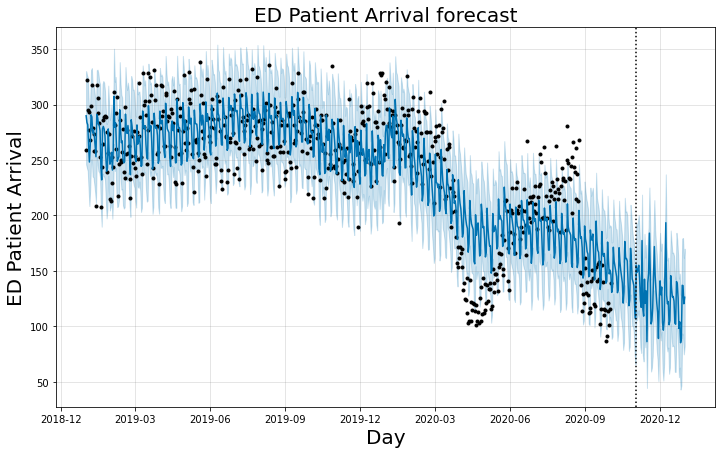

In [372]:
fig1 = m.plot(forecast)

datenow = datetime(2020, 11, 2)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

#plt.xlim([datestart, dateend])
plt.title("ED Patient Arrival forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("ED Patient Arrival", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")

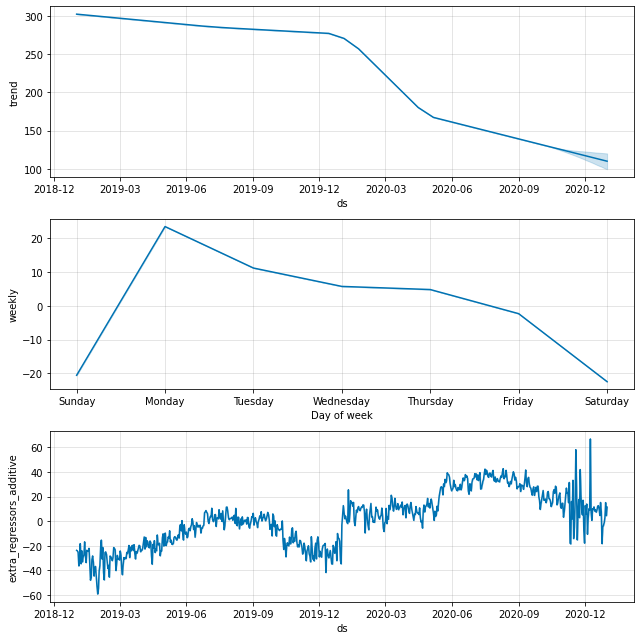

In [373]:
fig2 = m.plot_components(forecast)

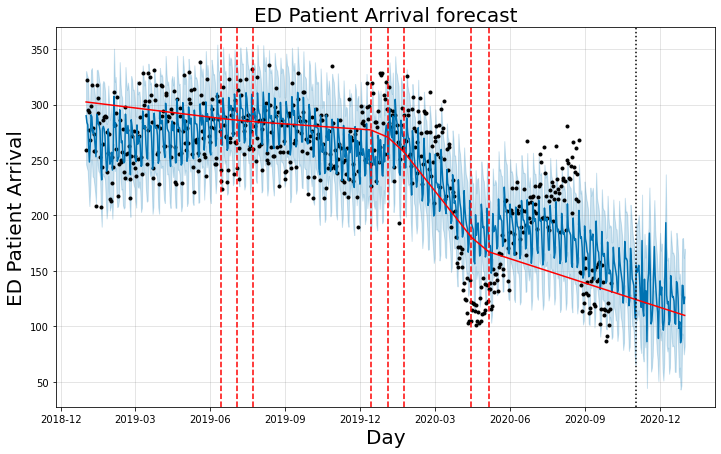

In [374]:
# include changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m,forecast)

datenow = datetime(2020, 11, 2)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

#plt.xlim([datestart, dateend])
plt.title("ED Patient Arrival forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("ED Patient Arrival", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")

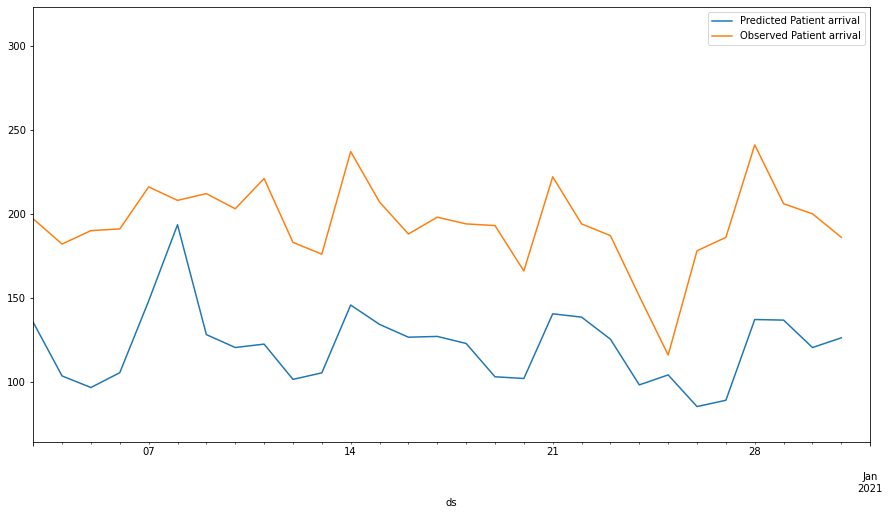

In [375]:
ax = forecast.plot(x='ds', y='yhat', label = 'Predicted Patient arrival', legend = True, figsize = (15,8))
test.plot(x='ds', y='y', label = 'Observed Patient arrival', legend = True, ax=ax, xlim = ('2020-12-03','2021-01-01'));

In [376]:
predictions2 = forecast.iloc[-90:]['yhat']

In [377]:
predictions2

641    130.704458
642    135.466322
643    171.395968
644    158.818934
645    154.145100
          ...    
726     89.067634
727    137.103048
728    136.752795
729    120.433812
730    126.236260
Name: yhat, Length: 90, dtype: float64

In [378]:
predictions3 =list(predictions2)

In [379]:
predictions3

[130.7044582842149,
 135.46632151939724,
 171.39596821179143,
 158.81893404243613,
 154.14510019664976,
 149.97098806702485,
 144.8101191694158,
 130.44195175972888,
 132.96322275712134,
 170.9320197092165,
 158.26314303310357,
 150.68898904876352,
 145.1374917024703,
 139.2294455959875,
 121.0453892629665,
 131.10360133474205,
 176.57057672752387,
 161.14072189977753,
 161.22186324618576,
 159.0848255207389,
 137.47244880735815,
 118.65460191170385,
 123.76539995501355,
 170.45641965682165,
 159.76306514233255,
 142.8089932378237,
 140.3731523304549,
 136.9911829955809,
 116.77457643065321,
 107.04562550569193,
 155.26012403214196,
 148.87143545747549,
 150.3933737969103,
 155.1513968566374,
 143.51379313102274,
 123.65964876830249,
 117.16490171518174,
 177.4156180408041,
 115.53587394068944,
 109.30370557666635,
 142.5889522438923,
 120.92048818264179,
 132.02682976790342,
 86.28965044861988,
 139.34073694421875,
 147.50878525610153,
 184.10418962880078,
 150.3241904191995,
 102.246

In [380]:
rmse(predictions2, test['y'])

78.00152484927108

In [381]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions2, test['y'])

72.3986353029677

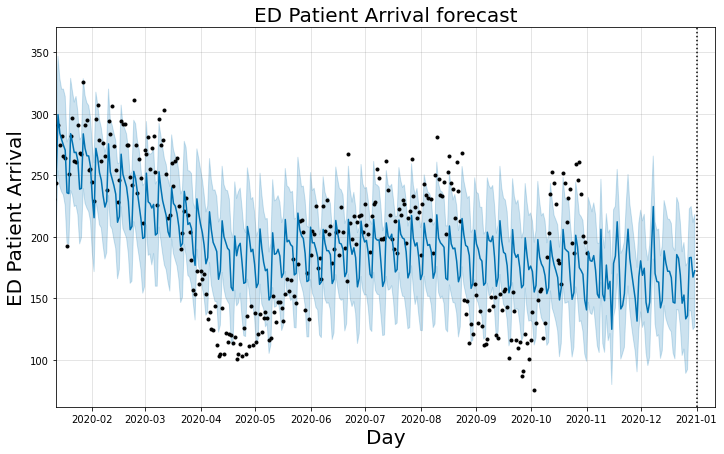

In [315]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2021, 1, 1)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

plt.xlim([datestart, dateend])
plt.title("ED Patient Arrival forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("ED Patient Arrival", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

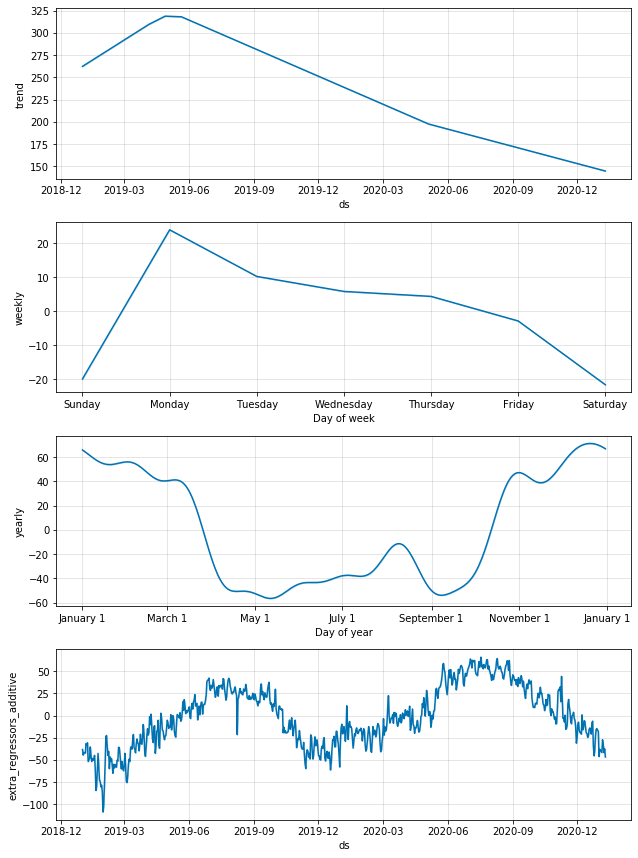

In [385]:
fig3 = m.plot_components(forecast)

In [386]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='2 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 363 forecasts with cutoffs between 2020-01-02 00:00:00 and 2020-12-29 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,1254.117327,35.413519,28.401199,0.166940,0.120345,0.573003
1,2 days,1395.558574,37.357176,29.992673,0.176717,0.125007,0.542700


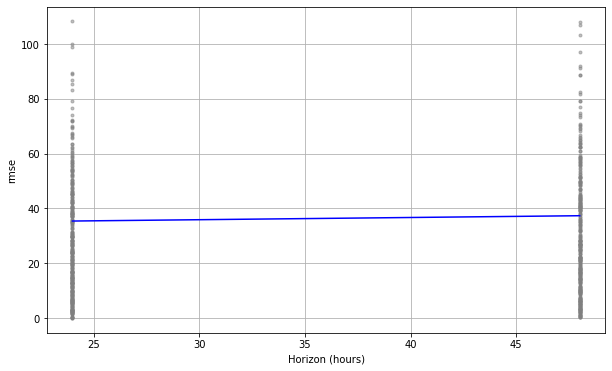

In [387]:
from fbprophet.plot import plot_cross_validation_metric
fig4 = plot_cross_validation_metric(df_cv, metric='rmse')